# Mean, Median and Mode

Date published: 2018-11-28

Category: Math

Subcategory: Descriptive Statistics

Tags: mean, median, mode, python, pandas


I'll discuss several summary statistics that are popular for describing the central tendancy of a field. Mean, median and mode are three popular summary statistics. Each of those are appropriate to describe the central tendancy of a field under certain conditions. 

I'll use an example of meal bill amounts in the `tips` dataset to elaborate on these three concepts.

### Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

UsageError: Line magic function `%` not found.


Visualization styling code

In [2]:
sns.set_context('talk')

### Example 1: Tips Dataset

Let's get the `tips` dataset from the `seaborn` library and assign it to the DataFrame `df_tips`.

In [3]:
df_tips = sns.load_dataset('tips')

Each row represents a unique meal at a restaurant for a party of people; the dataset contains the following fields:

column name | column description 
--- | ---
`total_bill` | financial amount of meal in U.S. dollars
`tip` |  financial amount of the meal's tip in U.S. dollars
`sex` | gender of server
`smoker` | boolean to represent if server smokes or not
`day` | day of week
`time` | meal name (Lunch or Dinner)
`size` | count of people eating meal

Preview the first 5 rows of `df_tips`. 

In [4]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Visualize Distribution of Total Bill Amounts

First off, I like to visualize the distribution of data in a field. Below is a histogram to illustrate the distribution of values in the `total_bill` field. The x-axis indicates total bill amounts and the y-axis indicates the frequency (aka count) of occurences of those total bill amounts.

From a visual standpoint, it looks like most total bill amounts are around 12 to 20. I can also see a long tail to the right in which there are total bill amounts up to 50.

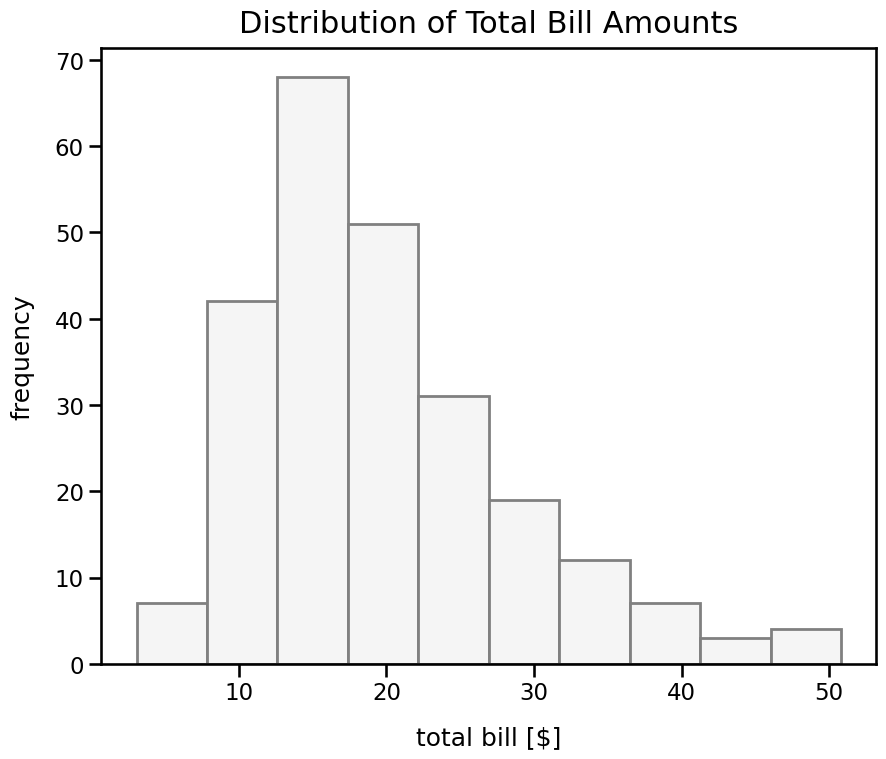

In [5]:
df_tips['total_bill'].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("total bill [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Total Bill Amounts", y=1.012, fontsize=22);

#### Mode

The **mode** is the most frequently occuring value in a field. 

We can use the pandas `mode()` method to calculate the mode of `total_bill` column in `df_tips`.

In [6]:
mode_total_bill = df_tips['total_bill'].mode().iloc[0]
mode_total_bill

13.42

Our mode is 13.42. 

We can also query our `df_tips` DataFrame to see the bills in which the `total_bill` is equal to 13.42. We're returned three unique meals.

In [7]:
df_tips.query('total_bill==13.42')

,total_bill,tip,sex,smoker,day,time,size
121,13.42,1.68,Female,No,Thur,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
224,13.42,1.58,Male,Yes,Fri,Lunch,2


#### Mean

The arithmetic **mean**, also known as the *average*, is the average of the values in a field. To calculate this: add up all the numbers and divide by how many numbers there are. This is equivalent to the sum of a field divided by the count of numbers in a field. 

The mean of a population can be denoted by $\mu$ and is the sum of all values in the population divided by the count of values in the population. It's represented by the formula: 

$$ \mu = \frac{\sum{x}}{N} $$

The mean of a sample can be denoted by $\bar{x}$ and is the sum of all values in the sample divided by the count of values in the sample. It's represented by the formula:

$$ \bar{x} = \frac{\sum{x}}{n} $$

We can use the pandas `mean()` method to calculate the mean of the `total_bill` column in `df_tips` and I'll round this value to two decimal places.

In [8]:
mean_total_bill = round(df_tips['total_bill'].mean(), 2)
mean_total_bill

19.79

The mean is 19.79

#### Median

Once a set of values are sorted, the **median** is the *middle* value. 

We can use the pandas `median()` method to calculate the median of the `total_bill` column in `df_tips`.

In [9]:
median_total_bill = df_tips['total_bill'].median()
median_total_bill

17.795

The median is 17.795

In another example, we can have a list of the following numbers: $1$ $1$ $3$ $5$ $9$ $10$

This list is already sorted. We have 6 numbers in this list so there's no perfect middle number. To find the median, we have to calculate the arithmetic mean of the middle two numbers: $3$ and $5$

The mean of these two numbers is $4$ and that's our median.

#### Visualize Mean, Median and Mode on Our Total Bill Histogram

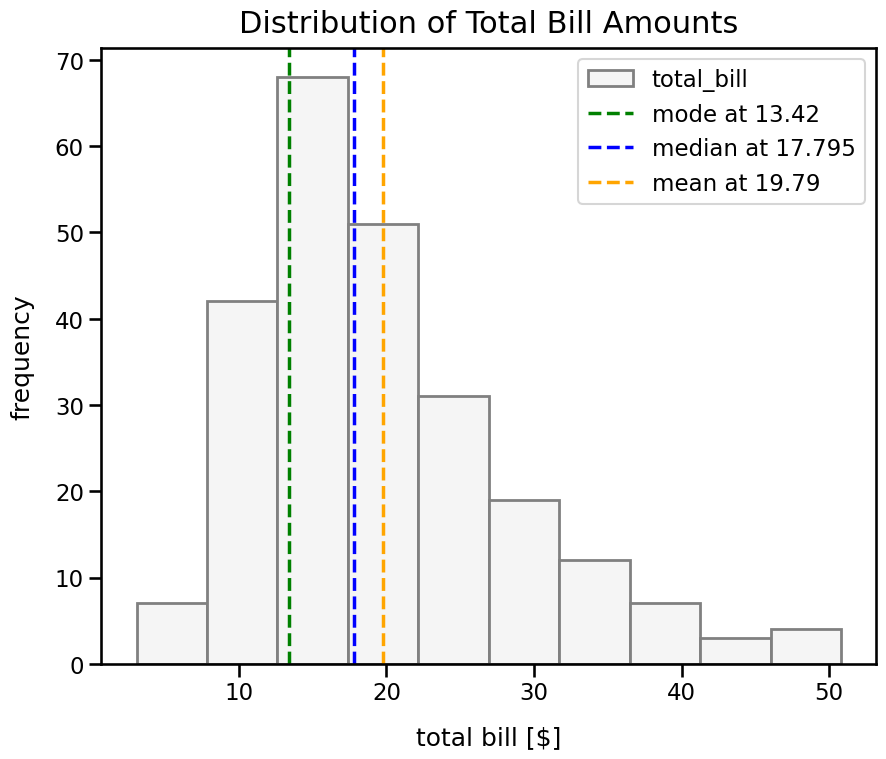

In [10]:
df_tips['total_bill'].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("total bill [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Total Bill Amounts", y=1.012, fontsize=22)
measurements = [mode_total_bill, median_total_bill, mean_total_bill]
names = ["mode", "median", "mean"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

We can now visually see that the long tail of large total bill values causes our mean to be the greatest of the three summary statistics to describe central tendancy.

### Pros and Cons of These Summary Statistics to Describe Central Tendancy

#### Mode

The mode can be flawed for describing the central tendancy of a field because it ignores a lot of data. In our `total_bill` field, the majority of values seem to be above 18 yet our mode is much lower at just 13.42. 

Hypothetically, if we had a record of four meals with a total bill size of 30, that would be our mode. However, a value of 30 would seem far off from the what we visually can see as the "center" of the data.

#### Mean

The mean is typically the most common summary statistic for the "center" of a set of values. The mean works well if the data is normally distributed. Otherwise, if there's just a few values in a field that are incredibly small or large (often called outliers), then our mean can be distorted. 

Hypothetically, if in one day four meals had total bill values of 15, 20, 25 and 60, our mean would be 40; yet a value of 40 would be much higher than the majority of our values since it's far larger than 15, 20 and 25. So, in this instance, the mean would be a poor measure to describe the "center" of the data.

#### Median

The median is typically a good measurement to describe the "center" of a set of values. An advantage of the median is that it's less biased when working with skewed data. For example, to continue on the simple example above, if in one day four meals had total bill values of 15, 20, 25 and 60, our mean would be 40; this number seems very far off from the "center" of the values. The mean calculation is heavily skewed by this large value of 60. However, the median of these four values is 22.5 (halfway between 20 and 25) which seems closer to the "center" of the data and is less biased than the mean.

### Example 2: Geography Majors at UNC

This is a fictional dataset that includes the net worth values of geography graduates from the last 20 years at the University of North Carolina at Chapel Hill. We'll illustrate the central tendancy of these net worth values.

First, I'll generate this random data using numpy's random module and <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html'>normal() method</a> and assign it to the DataFrame `df_net_worth`. 

In [11]:
np.random.seed(42) # seed random number generator with fixed value so we always get same values below
net_worth_values = list(np.random.normal(loc=80000, scale=25000, size=2800))
michael_jordan_net_worth = 1700000000
net_worth_values.append(michael_jordan_net_worth)
df_net_worth = pd.DataFrame({'net_worth': net_worth_values})

Preview the first few rows of `df_net_worth`.

In [12]:
df_net_worth.head()

,net_worth
0,92417.853825
1,76543.392471
2,96192.213453
3,118075.746410
4,74146.165632


Let's examine common percentile values. We'll use the <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html'>quantile() Series method</a> in pandas.

In [13]:
for percentile in [0.01, 0.25, 0.50, 0.75, 0.99]:
    value = df_net_worth['net_worth'].quantile(q=percentile)
    print("{0}th percentile is {1}".format(percentile, value))

0.01th percentile is 24703.45221676233
0.25th percentile is 64268.41515768028
0.5th percentile is 80707.95940326153
0.75th percentile is 96829.53378174896
0.99th percentile is 139096.81236548402


It seems our 55th percentile is a value of 80,707 and values are typically within 24,000 and 140,000. 

We can visualize our net worth values in this range of 26,000 to 14,000. The visualization below shows a fairly normal distributon and I'd figure the "center" of our data is around 80,000.

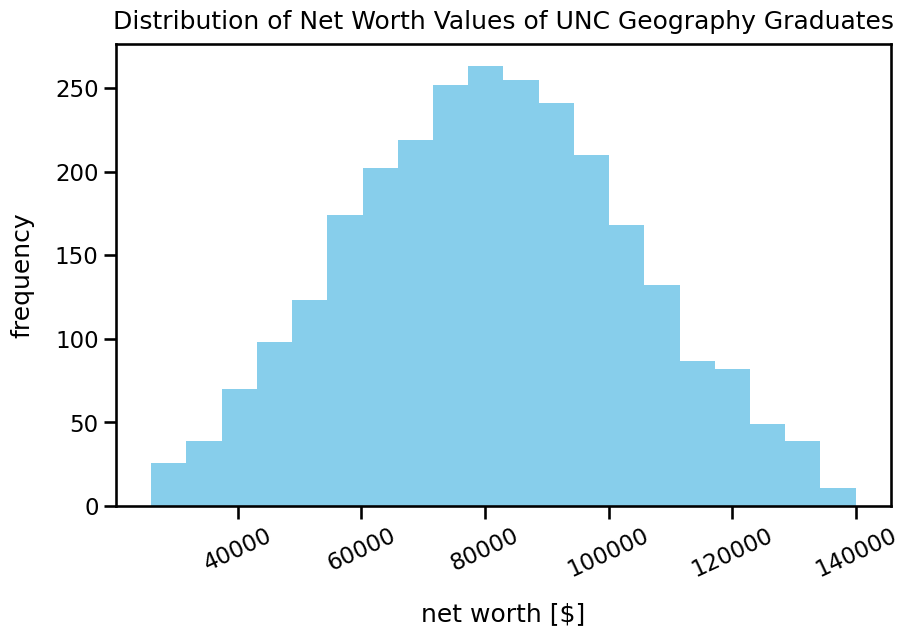

In [14]:
df_net_worth['net_worth'].plot(kind='hist', range=[26000, 140000], color='skyblue', figsize=(10, 6), bins=20, rot=25)
plt.xlabel("net worth [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Net Worth Values of UNC Geography Graduates", y=1.015);

We can calculate the mean `net_worth` value at 687,757

In [15]:
int(df_net_worth['net_worth'].mean())

687757

This value of 687,757 seems way higher than the 80,000 we expected. Why is that?

Well, the famous NBA basketball player Michael Jordan also attended UNC and graduated with a degree in Geography. He has a net worth of 1.7B. His super high net worth skews the mean to be a very high number. 

Let's calculate the median value of the `net_worth` column below. The median is 80,708 which which seems like a far more reasonable metric to describe the "center" of the data.

In [16]:
median = int(df_net_worth['net_worth'].median())
median

80707

Let's plot this median on our histogram so we can better see how it represents the "center" of the data.

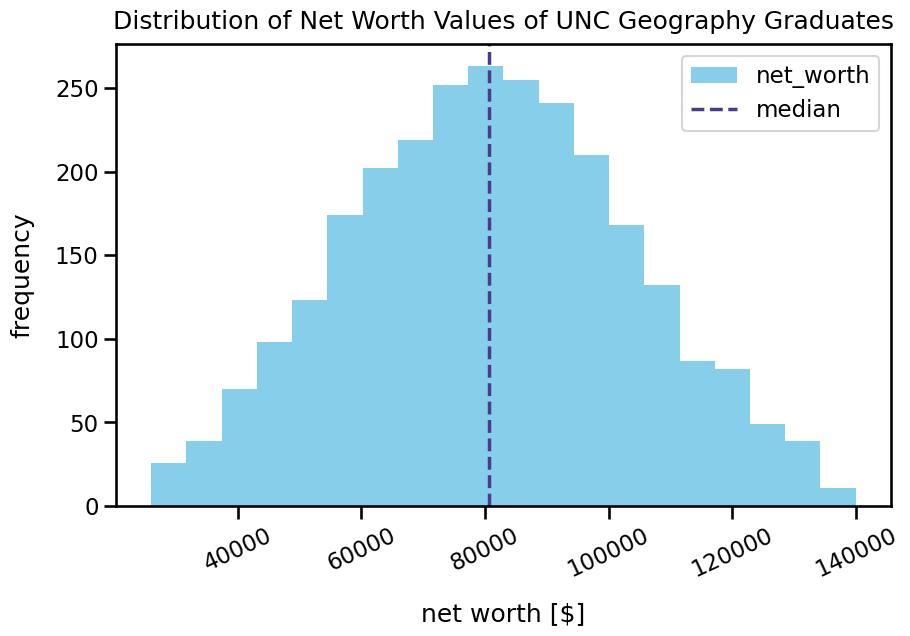

In [17]:
df_net_worth['net_worth'].plot(kind='hist', range=[26000, 140000], color='skyblue', figsize=(10, 6), bins=20, rot=25)
plt.xlabel("net worth [$]", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Distribution of Net Worth Values of UNC Geography Graduates", y=1.015)
plt.axvline(x=median, linestyle='--', linewidth=2.5, label='median', c='darkslateblue')
plt.legend();